In [112]:
import numpy as np
import pandas as np
import matplotlib.pyplot as plt
import seaborn as sns

titanic_data = sns.load_dataset('titanic')
titanic_data.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [114]:
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [116]:
titanic_data.isnull().sum()


survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

### Limpeza dos dados
Primeiro passo é retirar ou reformular todos os dados missings.
Em seguida dropar todos dados repitidos.
Assim nossos dados ficam mais completos proporcionando uma analise melhor do data frame.

In [118]:
titanic_data['age'] = titanic_data['age'].fillna(titanic_data['age'].median())
titanic_data['embarked'] = titanic_data['embarked'].fillna(titanic_data['embarked'].mode()[0])
titanic_data['embark_town'] = titanic_data['embark_town'].fillna(titanic_data['embark_town'].mode()[0])

In [120]:
titanic_data = titanic_data.drop(columns=['deck'])
titanic_data.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,Southampton,no,True


In [128]:
titanic_data = titanic_data.drop_duplicates()
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 775 entries, 0 to 890
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     775 non-null    int64   
 1   pclass       775 non-null    int64   
 2   sex          775 non-null    object  
 3   age          775 non-null    float64 
 4   sibsp        775 non-null    int64   
 5   parch        775 non-null    int64   
 6   fare         775 non-null    float64 
 7   embarked     775 non-null    object  
 8   class        775 non-null    category
 9   who          775 non-null    object  
 10  adult_male   775 non-null    bool    
 11  embark_town  775 non-null    object  
 12  alive        775 non-null    object  
 13  alone        775 non-null    bool    
dtypes: bool(2), category(1), float64(2), int64(4), object(5)
memory usage: 75.1+ KB


### Analise descritiva

In [132]:
titanic_data.describe(include='all')

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
count,775.000000,775.000000,775,775.000000,775.000000,775.000000,775.000000,775,775,775,775,775,775,775
unique,NaN,NaN,2,NaN,NaN,NaN,NaN,3,3,3,2,3,2,2
top,NaN,NaN,male,NaN,NaN,NaN,NaN,S,Third,man,True,Southampton,no,True
freq,NaN,NaN,483,NaN,NaN,NaN,NaN,562,401,443,443,562,455,437
mean,0.412903,2.246452,NaN,29.581187,0.529032,0.420645,34.878403,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,0.492674,0.853574,NaN,13.766359,0.990326,0.840565,52.408474,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,0.000000,1.000000,NaN,0.420000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,0.000000,1.000000,NaN,21.000000,0.000000,0.000000,8.050000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,0.000000,3.000000,NaN,28.000000,0.000000,0.000000,15.900000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,1.000000,3.000000,NaN,36.000000,1.000000,1.000000,34.197900,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Analise descritiva
Em seguida começamos a plotar os dados em alguns gráficos para poder analisar a distribuição e a frequencia dos dados, afim de entender os possiveis padrões dos sobreviventes

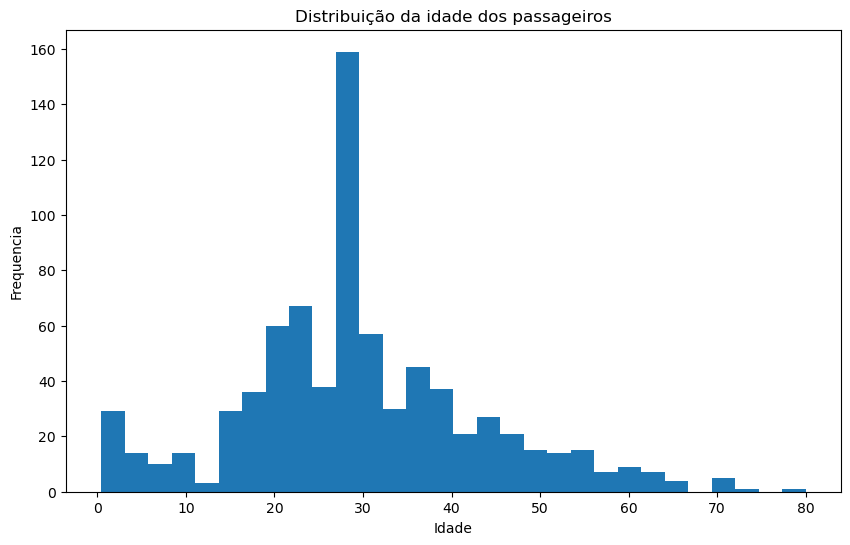

In [152]:
plt.figure(figsize=(10,6))
plt.hist(titanic_data['age'], bins=30, histtype='stepfilled')
plt.title('Distribuição da idade dos passageiros')
plt.ylabel('Frequencia')
plt.xlabel('Idade')
plt.show()

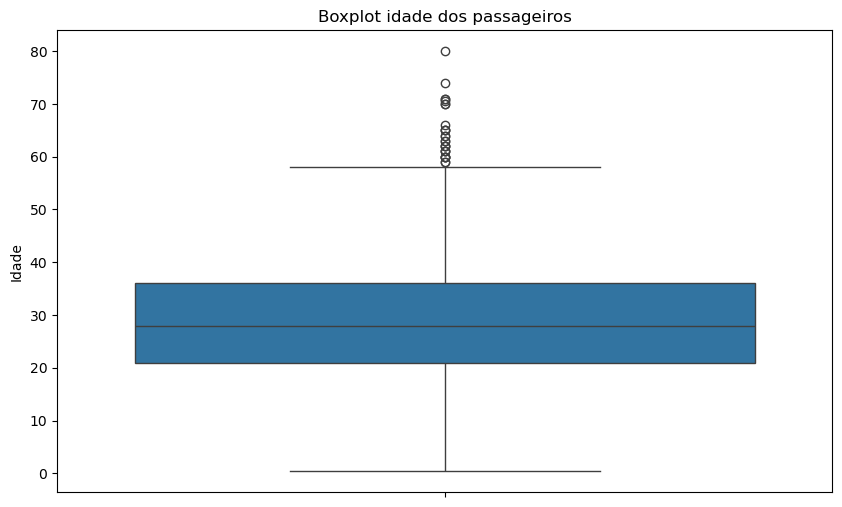

In [162]:
plt.figure(figsize=(10,6))
sns.boxplot(titanic_data['age'])
plt.title('Boxplot idade dos passageiros')
plt.ylabel('Idade')
plt.show()

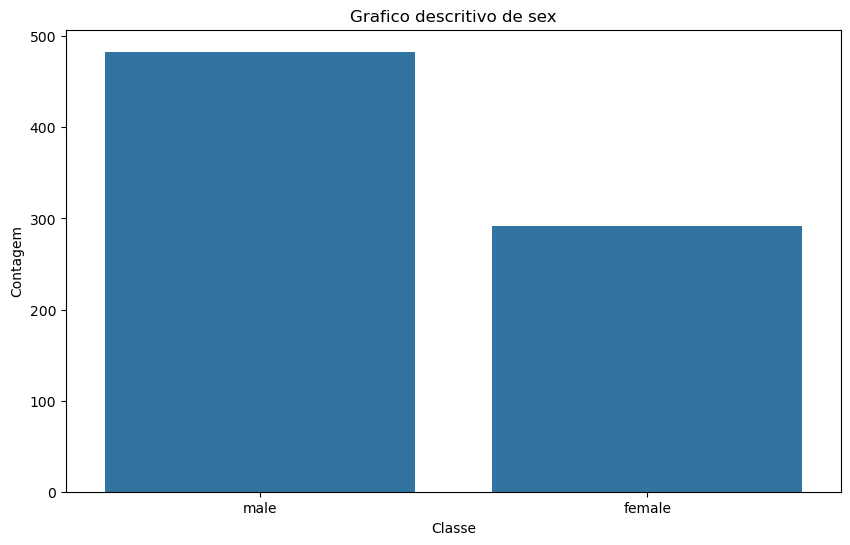

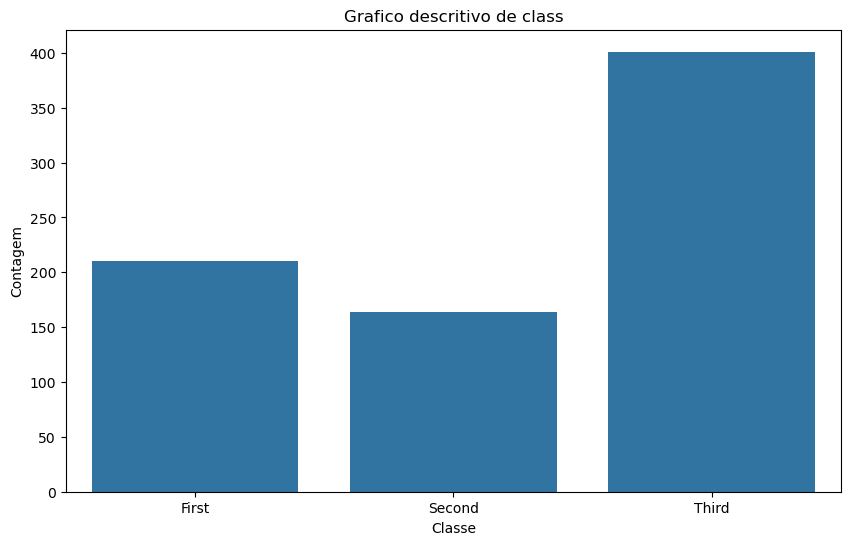

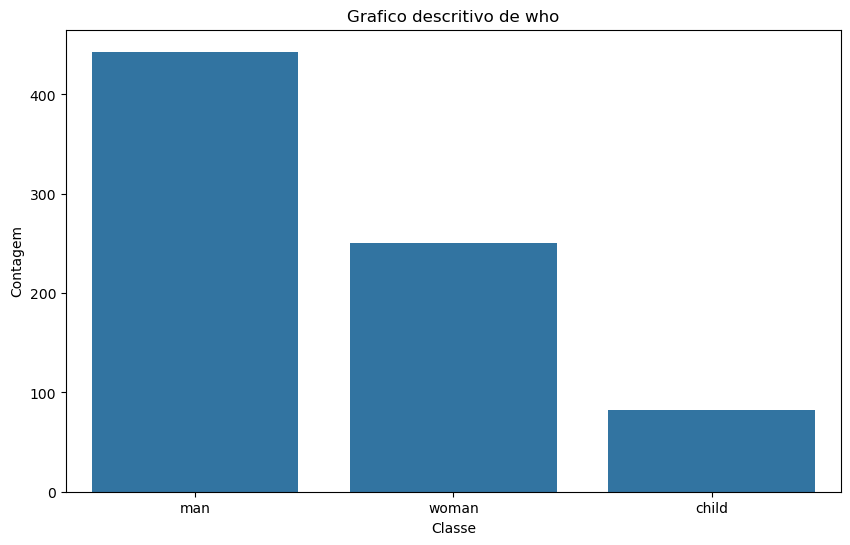

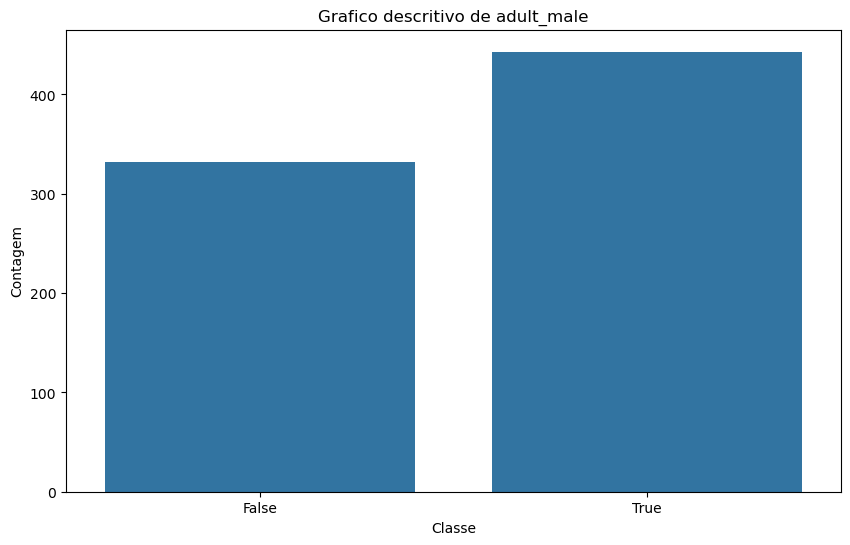

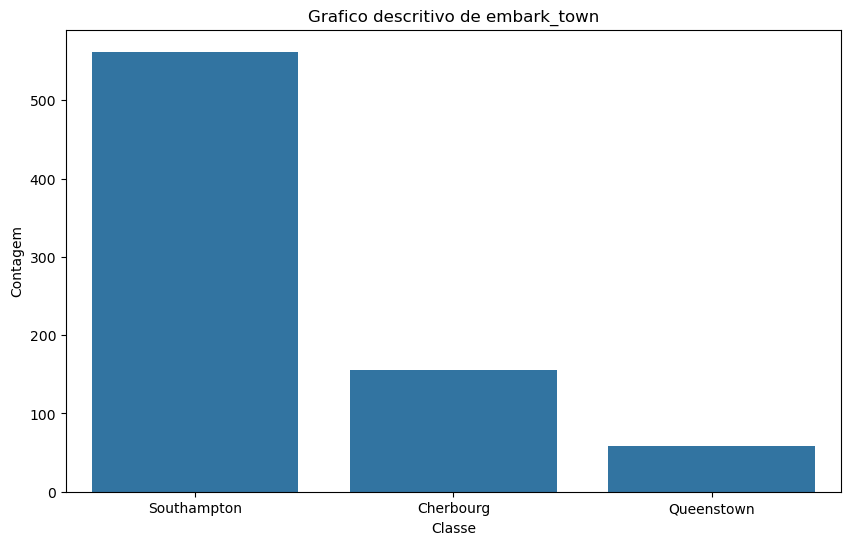

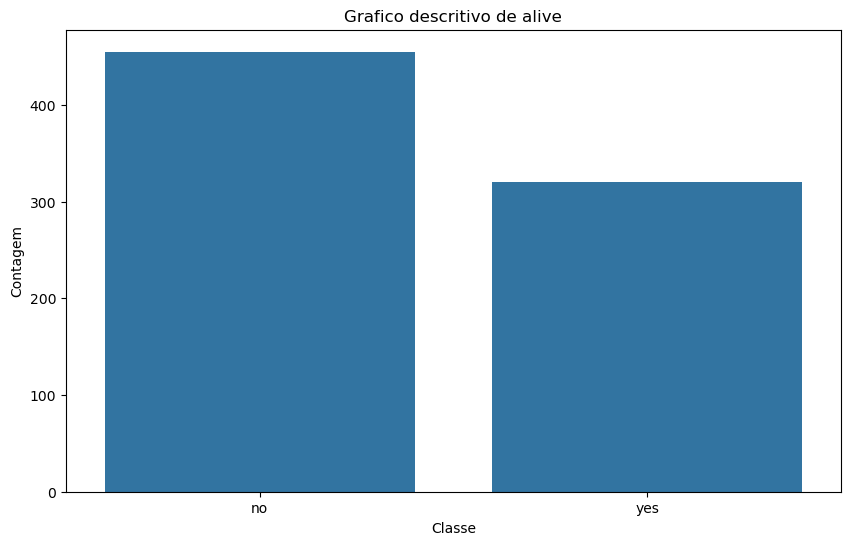

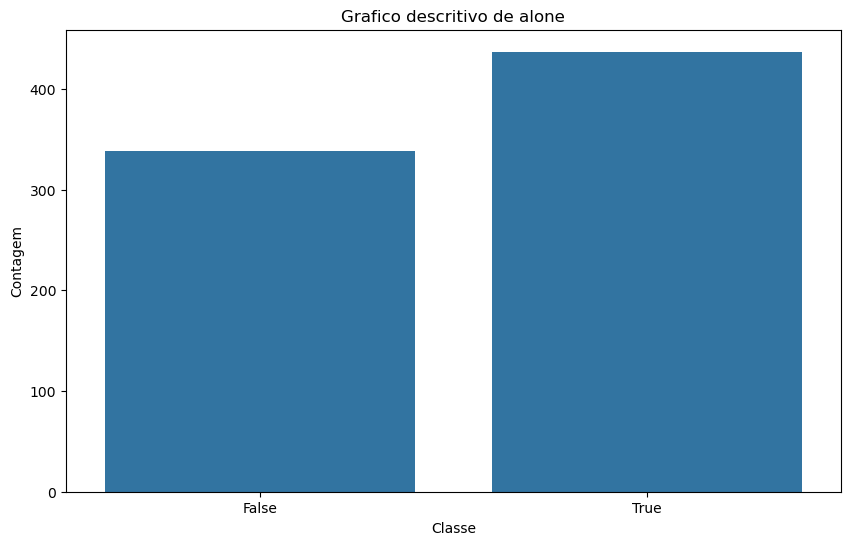

In [166]:
var_categ = ['sex', 'class', 'who', 'adult_male', 'embark_town', 'alive', 'alone']
for var in var_categ:
    plt.figure(figsize=(10,6))
    plt.title(f'Grafico descritivo de {var}')
    sns.countplot(x=var, data=titanic_data)
    plt.xlabel('Classe')
    plt.ylabel('Contagem')
    plt.show()


### Analise de distribuição de bivariadas
Em seguida analisamos graficos  de distribuição bivariada, fazendo um comparativo entre dois ou mais variaveis afim de encontrar padroes entre os sobreviventes

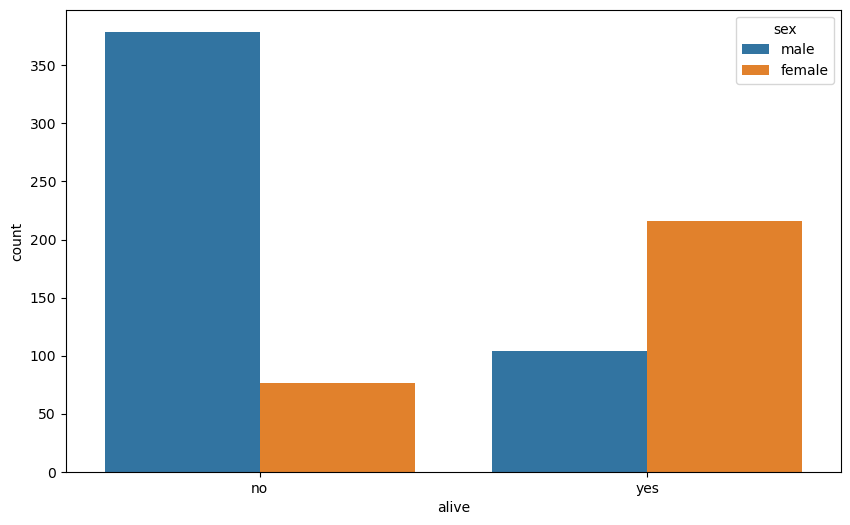

In [172]:
plt.figure(figsize=(10,6))
sns.countplot(x='alive', hue='sex', data=titanic_data)
plt.show()

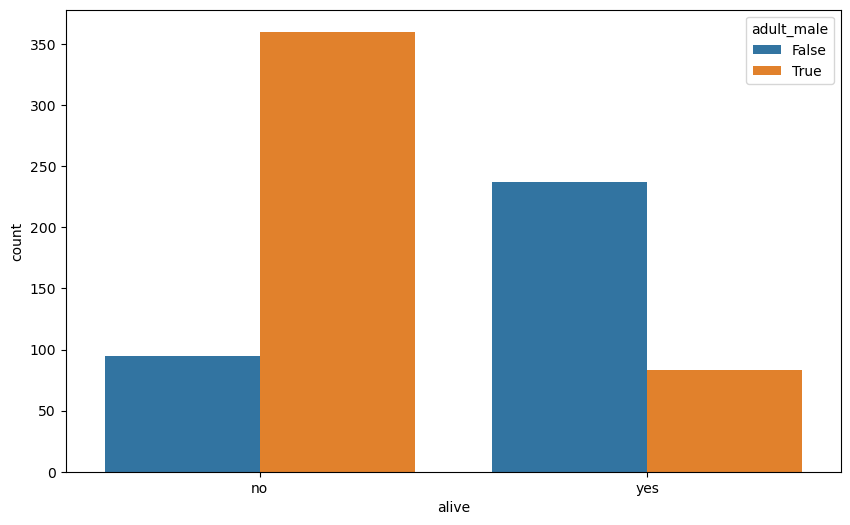

In [174]:
plt.figure(figsize=(10,6))
sns.countplot(x='alive', hue='adult_male', data=titanic_data)
plt.show()

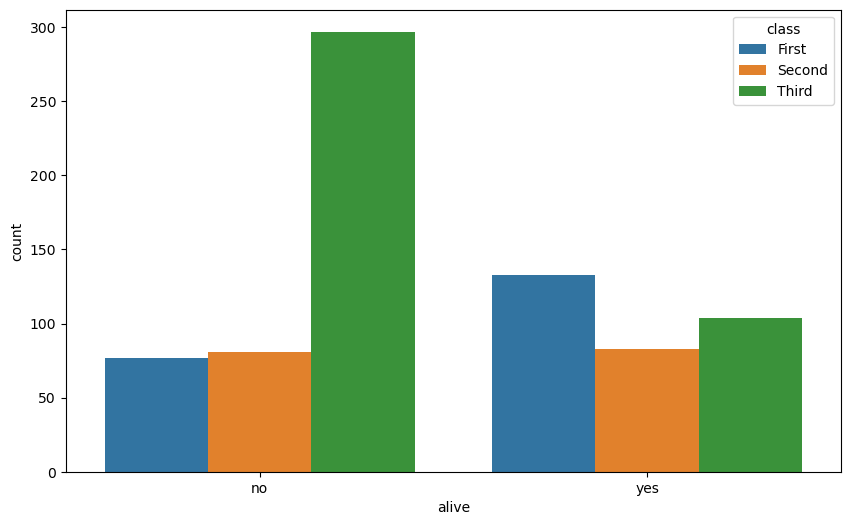

In [176]:
plt.figure(figsize=(10,6))
sns.countplot(x='alive', hue='class', data=titanic_data)
plt.show()

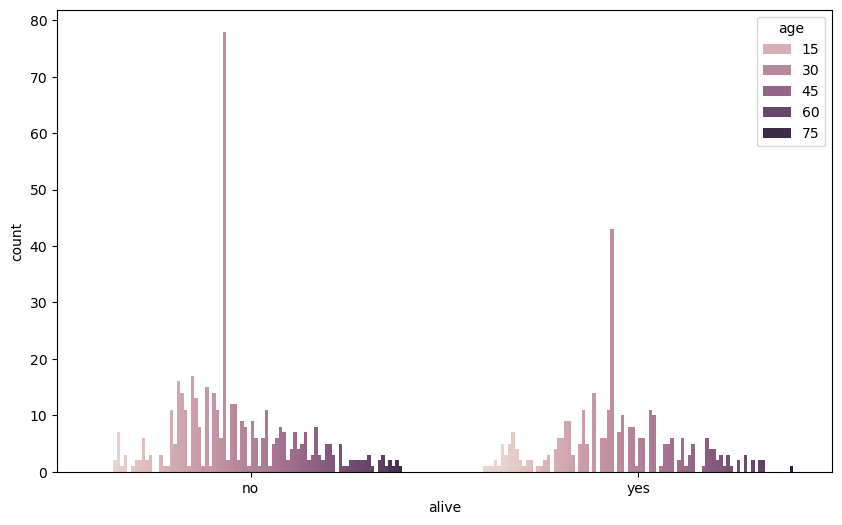

In [190]:
plt.figure(figsize=(10,6))
sns.countplot(x='alive', hue='age', data=titanic_data)
plt.show()

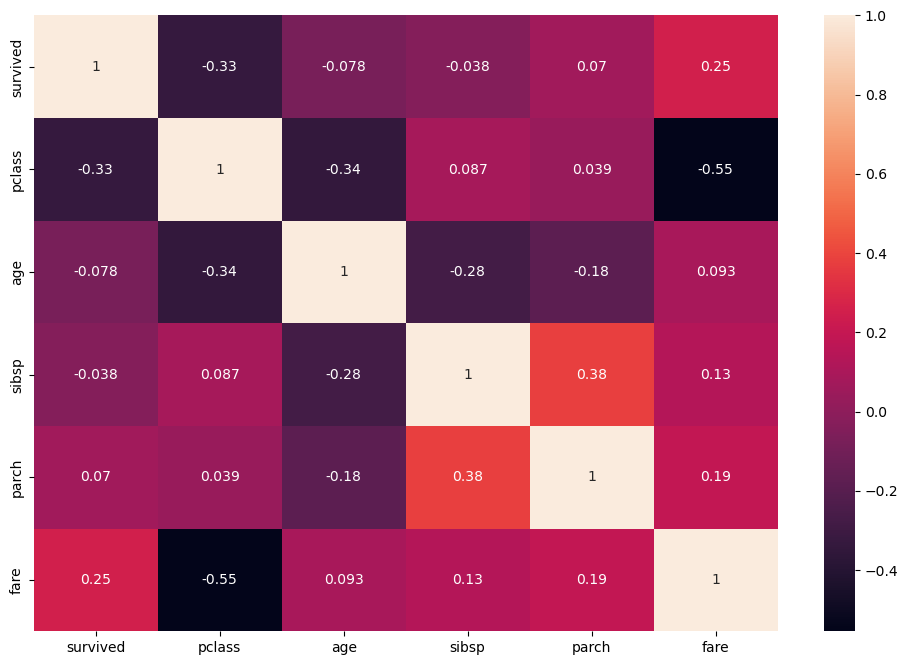

In [197]:
titanic_quant = titanic_data[['survived', 'pclass', 'age', 'sibsp', 'parch', 'fare']]

corr = titanic_quant.corr()

plt.figure(figsize=(12,8))
sns.heatmap(corr, annot=True)
plt.show()

### Conclusão
Segundo os dados resgatados, os estudos apontaram um padrão para os sobreviventes.  
Para sobreviver ao naufragio na época, ia ser levado em conta seu sexo, sua idade e a classe na qual estava alocado.  
Segundo os estudos pessoas do sexo feminino, crianças, idosos e pessoas que ocupavam a primeira classe teriam maior probabilidade de sobreviver.